Digit Recognizer  with Keras 

Importing the required Library 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

test.csv
train.csv



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten, Input
from keras.optimizers import adam
from keras.utils.np_utils import to_categorical

import seaborn as sns

%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [3]:
train = pd.read_csv("../input/train.csv")

In [4]:
X_train = train.iloc[:,1:].values
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #reshape to rectangular
X_train = X_train/255 #pixel values are 0 - 255 - this makes puts them in the range 0 - 1

y_train = train["label"].values

In [5]:
y_ohe = to_categorical(y_train)

In [6]:
model = Sequential()

model.add(Convolution2D(20, 5, 5, input_shape = (28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Convolution2D(40, 5, 5, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(100, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(100, activation = "relu"))
model.add(Dense(10, activation="softmax"))



/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (5, 5), input_shape=(28, 28, 1..., activation="relu")`
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (5, 5), activation="relu")`


In [7]:
model.compile(loss='categorical_crossentropy', 
              optimizer = adam(lr=0.001), metrics = ["accuracy"])

In [8]:
hist = model.fit(X_train, y_ohe,
          validation_split = 0.05, batch_size = 128, epochs = 8)

Train on 39900 samples, validate on 2100 samples
Epoch 1/8
39900/39900 [==============================] - 48s - loss: 0.7682 - acc: 0.7400 - val_loss: 0.1636 - val_acc: 0.9500
Epoch 2/8
39900/39900 [==============================] - 43s - loss: 0.2570 - acc: 0.9214 - val_loss: 0.1043 - val_acc: 0.9676
Epoch 3/8
39900/39900 [==============================] - 42s - loss: 0.1948 - acc: 0.9398 - val_loss: 0.0753 - val_acc: 0.9776
Epoch 4/8
39900/39900 [==============================] - 43s - loss: 0.1596 - acc: 0.9521 - val_loss: 0.0732 - val_acc: 0.9767
Epoch 5/8
39900/39900 [==============================] - 44s - loss: 0.1401 - acc: 0.9577 - val_loss: 0.0629 - val_acc: 0.9786
Epoch 6/8
39900/39900 [==============================] - 41s - loss: 0.1305 - acc: 0.9613 - val_loss: 0.0525 - val_acc: 0.9810
Epoch 7/8
39900/39900 [==============================] - 42s - loss: 0.1181 - acc: 0.9643 - val_loss: 0.0547 - val_acc: 0.9829
Epoch 8/8
39900/39900 [==============================] - 41s -

In [9]:
model.save_weights("model.h5")

In [10]:
model.load_weights("model.h5")

In [11]:
loss_and_metrics = model.evaluate(X_train, y_ohe, batch_size=128)

41984/42000 [============================>.] - ETA: 0s

In [12]:
#getting the 2D output:
output = model.get_layer("dense_3").output
extr = Model(model.input, output)

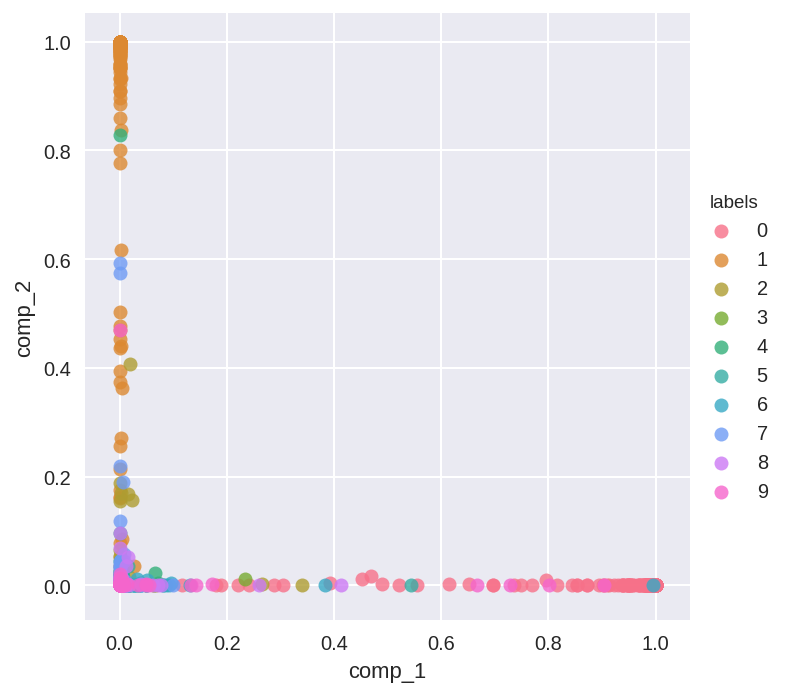

In [13]:
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

X_proj = extr.predict(X_train[:10000])
X_proj.shape

proj = pd.DataFrame(X_proj[:,:2])
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:10000]

sns.lmplot("comp_1", "comp_2",hue = "labels", data = proj, fit_reg=False)

In [14]:
test = pd.read_csv("../input/test.csv")

In [15]:
test = test.iloc[:,:].values
test = test.reshape(test.shape[0], 28, 28, 1)

In [16]:
pred = model.predict_classes(test,verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(pred)+1)),
                         "Label": pred})

In [17]:
submissions.to_csv("DR.csv", index=False, header=True)